Upgrade python package `requests`.

In [3]:
!pip install google-cloud requests keras tensorflow

    100% |████████████████████████████████| 38.8MB 13kB/s eta 0:00:011    84% |███████████████████████████     | 32.8MB 18.3MB/s eta 0:00:01    97% |███████████████████████████████ | 37.7MB 3.8MB/s eta 0:00:01��█████████████▊| 38.4MB 6.4MB/s eta 0:00:01
  Using cached enum34-1.1.6-py3-none-any.whl
    100% |████████████████████████████████| 1.7MB 276kB/s ta 0:00:011


    100% |████████████████████████████████| 890kB 344kB/s ta 0:00:011
    100% |████████████████████████████████| 81kB 3.5MB/s ta 0:00:011
  Running setup.py bdist_wheel for html5lib ... done
  Stored in directory: /Users/jonas/Library/Caches/pip/wheels/6f/85/6c/56b8e1292c6214c4eb73b9dda50f53e8e977bf65989373c962
Successfully built html5lib
  Found existing installation: html5lib 0.999
    DEPRECATION: Uninstalling a distutils installed project (html5lib) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
    Uninstalling html5lib-0.999:
      Successfully uninstalled html5lib-0.999


Import python packages.

In [4]:
# Imports the Google Cloud client library
from google.cloud import storage
from google.oauth2 import service_account

from google.cloud.exceptions import NotFound

# Inline display image
from IPython.display import Image, display

# Imports Keras packages and model
import numpy as np
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions


Using TensorFlow backend.


Update global setting to fit into your private environments.

In [5]:
# Credential JSON file
CREDENTIALS_JSON='./datalab-trial-71072497752e.json'
# GCP project id
PROJECT_ID='datalab-trial-186403'
# Bucket name of Cloud Storage
GCS_BUCKET_NAME='game_ml_training_pics_10k'

96116736/96112376 [==============================] - 27s 0us/step


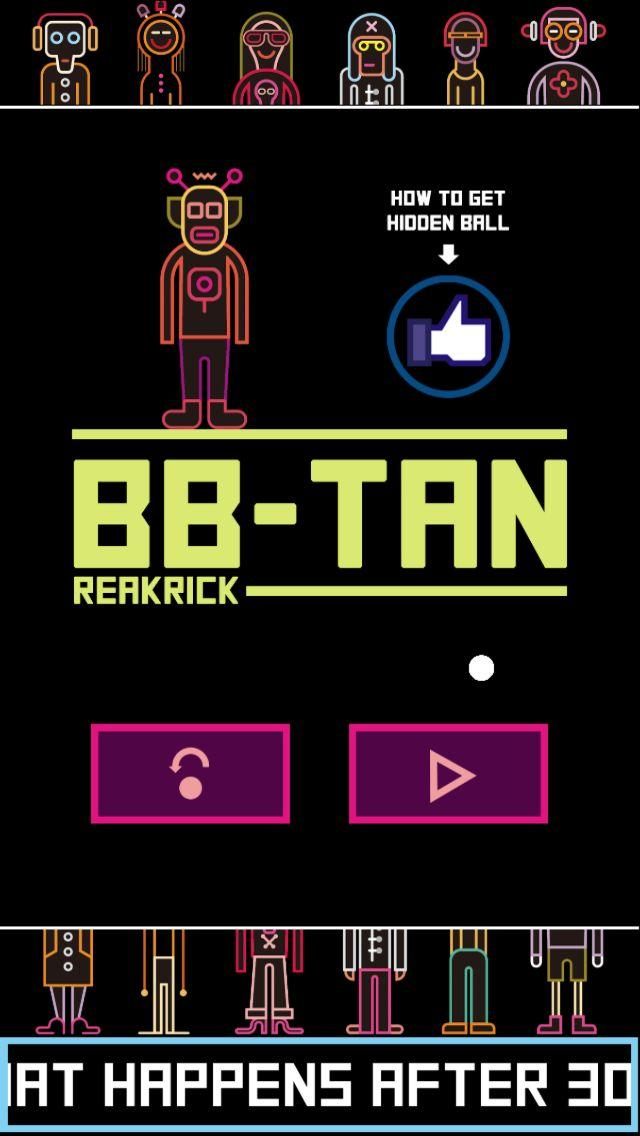

In [6]:
# Credentials for GCP
credentials = service_account.Credentials.from_service_account_file(CREDENTIALS_JSON)

# Instantiates a cloud storage client
storage_client = storage.Client(project=PROJECT_ID, credentials=credentials)

model = InceptionV3(weights='imagenet')

def show_blob(blob):
  blob.download_to_filename('/tmp/blob.jpeg')
  display(Image(filename='/tmp/blob.jpeg'))
    
if __name__ == '__main__':
    # check bucket availability
    try:
        bucket = storage_client.get_bucket(GCS_BUCKET_NAME)
    except NotFound:
        print('Sorry, the bucket {} does not exist!'.format(GCS_BUCKET_NAME))
    
    # iterate files in the bucket
    for f in bucket.list_blobs():
        show_blob(f)
        break
